<h1 style="text-align:center;color:#0F4C81">Polynomial Regression</h1>

What if your data is more complex than a straight line? Surprisingly, you can use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called _Polynomial Regression_.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

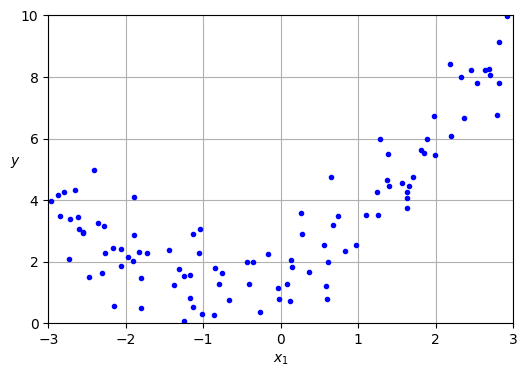

In [39]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s `PolynomialFeatures` class to transform our training data, adding the square (second-degree polynomial) of each feature in the
training set as a new feature (in this case there is just one feature):

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X[0] ** 2

(array([-0.75275929]), array([0.56664654]))

`X_poly` now contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training data

In [41]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

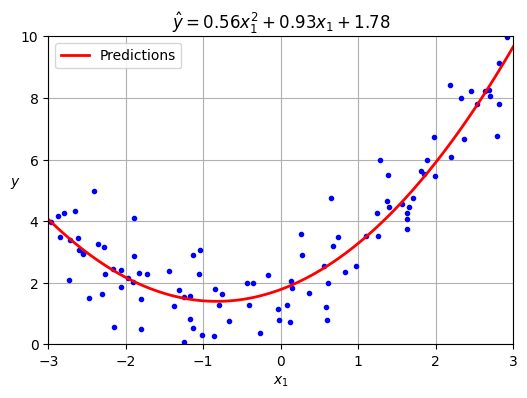

In [43]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.title(r"$\hat{y} = 0.56x_1^2 + 0.93x_1 + 1.78$")
plt.legend(loc='upper left')
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features, which is something a plain Linear Regression model cannot do. This is made possible by the fact that
`PolynomialFeatures` also adds all combinations of features up to the given degree. For example, if there were two features a and b, `PolynomialFeatures` with `degree=3` would not only add the features $a^2$, $a^3$, $b^2$, and $b^3$, but also the combinations $ab$, $a^2b$, and $ab^2$.

> `PolynomialFeatures(degree=d)` transforms an array containing $n$ features into an array containing $(n + d)! / d!n!$ features, where $n!$ is the factorial of $n$, equal to $1 × 2 × 3 × \cdots × n$. Beware of the combinatorial explosion of the number of features!

### Learning Curves

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression. For example, the example below applies a 300-degree polynomial model to the preceding
training data, and compares the result with a pure linear model and a quadratic model (second-degree polynomial). Notice how the 300-degree polynomial model wiggles around to get as close as possible to the
training instances.

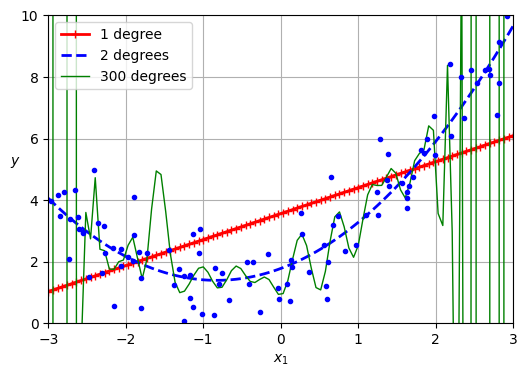

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (('r-+', 2, 1), ('b--', 2, 2), ('g-', 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, 'b.', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

This high-degree Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model, which makes sense
because the data was generated using a quadratic model. But in general you won't know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?



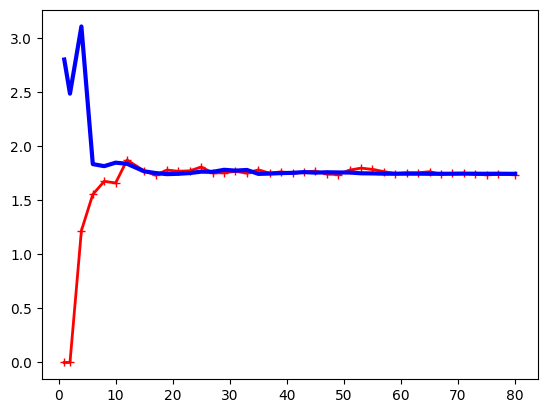

In [76]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
plt.show()